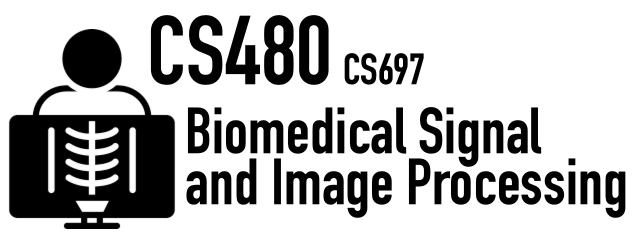
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['figure.figsize'] = [15, 8] # bigger plots

In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [5]:
ecg_new = ecg[8*SAMPLING_RATE : 11*SAMPLING_RATE]

In [6]:
len(ecg_new)

1080

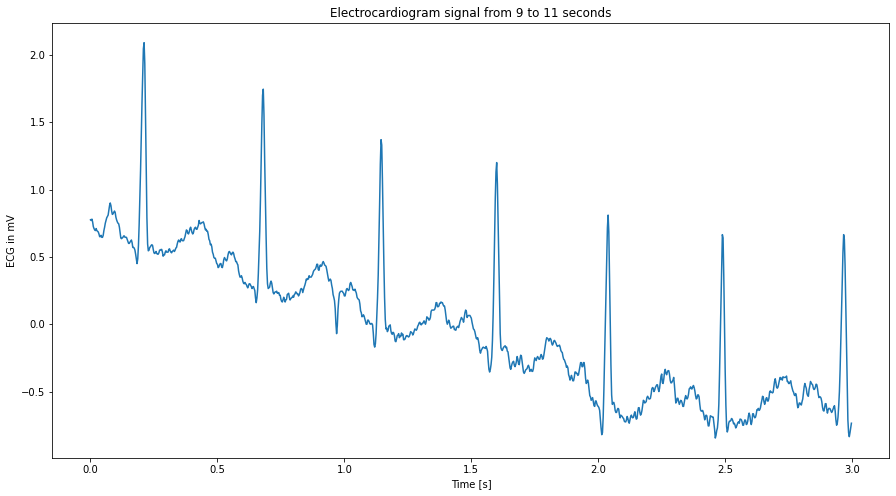

In [7]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

t = np.arange(ecg_new.size) / SAMPLING_RATE

plt.xlabel('Time [s]')
plt.ylabel('ECG in mV')
plt.title('Electrocardiogram signal from 9 to 11 seconds')
plt.plot(t, ecg_new)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [8]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [9]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 4.4 MB/s 


In [10]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [11]:
# Detect rpeaks between 9 and 11 seconds
_, rpeaks_new = nk.ecg_peaks(ecg_new, sampling_rate=SAMPLING_RATE)

In [12]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


In [13]:
# look at rpeaks between 9 and 11 seconds - the numbers indicate the samples that are R spikes
print(rpeaks_new['ECG_R_Peaks'])

[245 412 576 734 896]


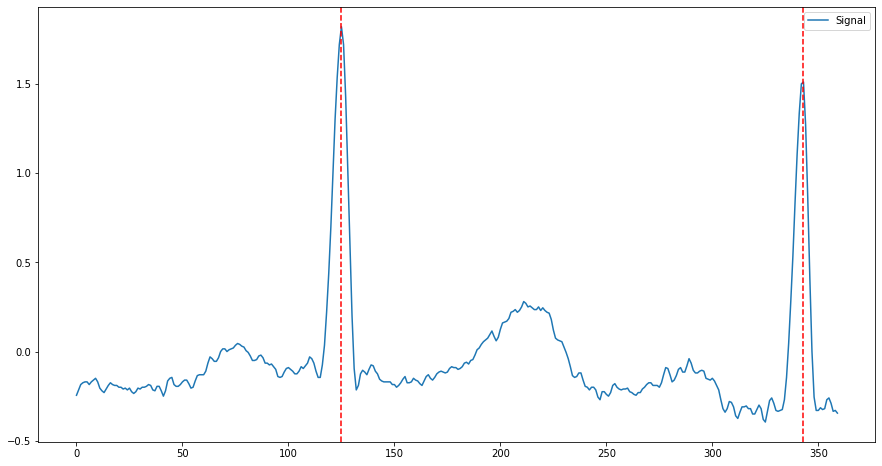

In [14]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:360])

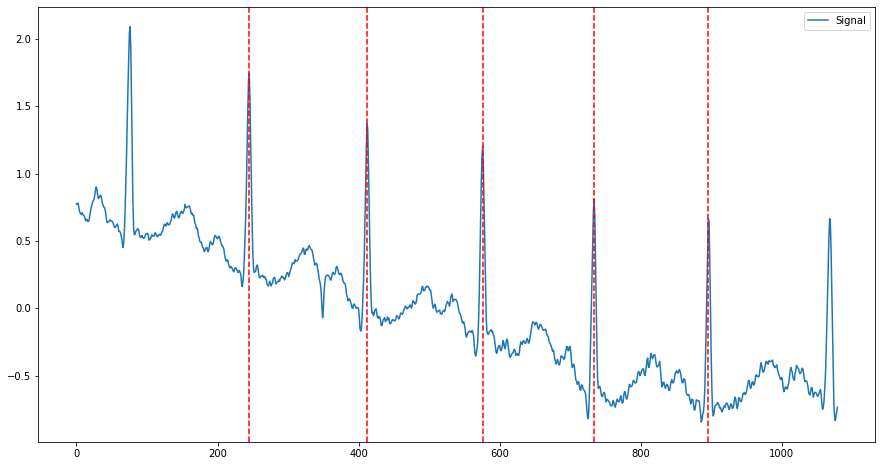

In [15]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1
plot = nk.events_plot(rpeaks_new['ECG_R_Peaks'], ecg_new)

**Task 3:** Detect Heartrate. [15 Points]

In [16]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [17]:
len(rpeaks['ECG_R_Peaks'])

503

In [18]:
heartbeat = ( len(rpeaks['ECG_R_Peaks']) * SAMPLING_RATE / len(ecg) ) * 60

In [19]:
heartbeat

100.60000000000001

In [20]:
# This is not a regular heart beat. Regular heartbeat is around 72 beats per minute.
#
#
# As per given data, there are 503 peaks in span of 300 seconds. That means the heart beat is around 101 beats per minute.
# This is fast heartbeat. 

**Task 4:** Detect P Q S T Peaks. [25 Points]

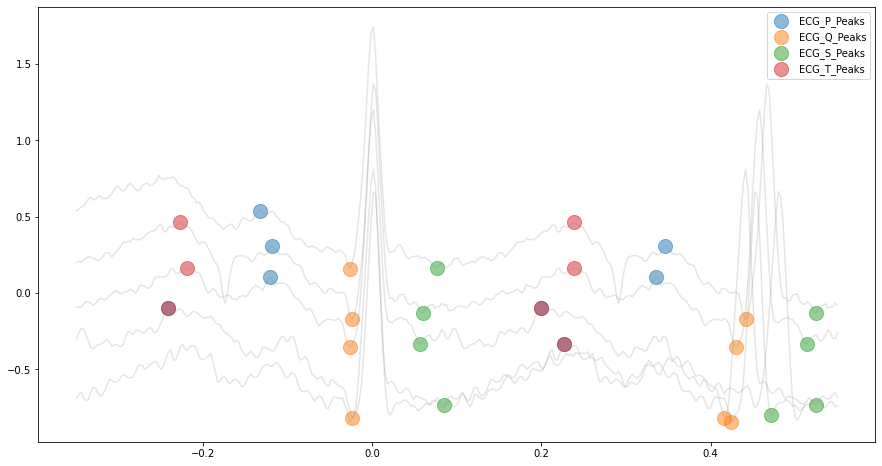

In [21]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)
_, waves_peak = nk.ecg_delineate(ecg_new, rpeaks_new, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [22]:
# TODO Does the detection work well?
#
#
# Detection works good between given time interval. There are a five rpeaks between 9 and 11 seconds.
# In above plot, we can see P Q S T peaks for most waves.  

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

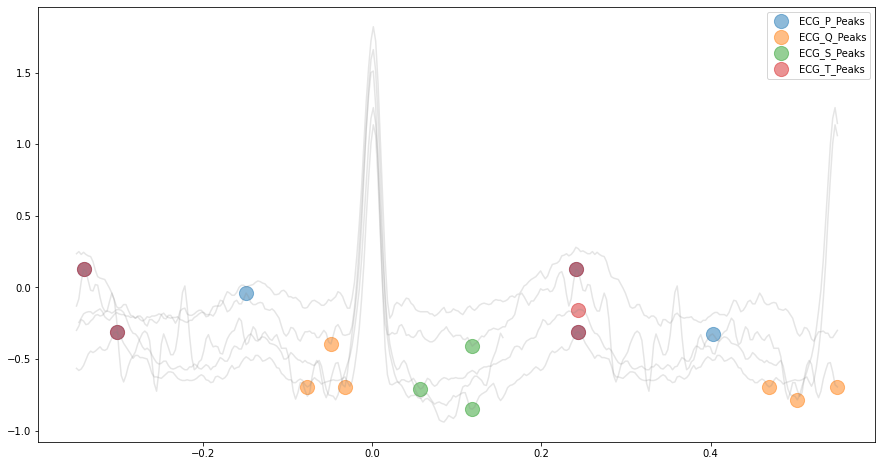

In [92]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
ecg1 = ecg[0:1000]
_, rpeaks1 = nk.ecg_peaks(ecg1, sampling_rate=SAMPLING_RATE)
signal_cwt, waves_peak = nk.ecg_delineate(ecg1, rpeaks1, sampling_rate=SAMPLING_RATE, method="cwt", show=True, show_type='peaks')

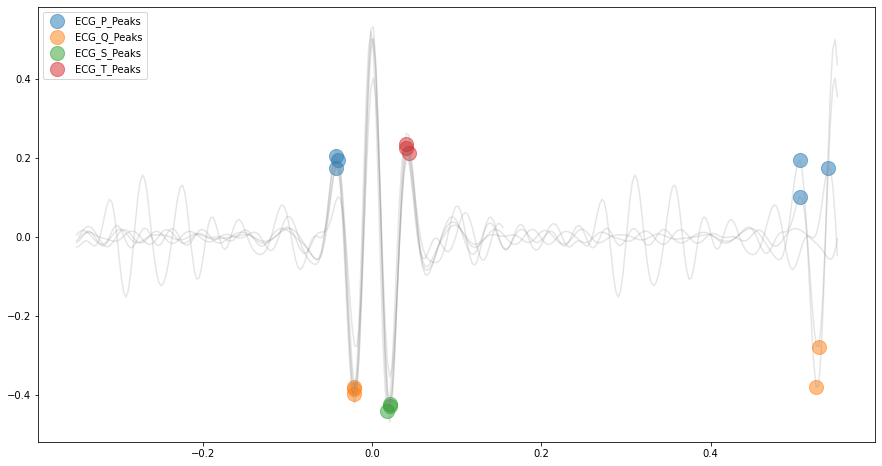

In [136]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filterd = nk.signal_filter(ecg1, lowcut=50, highcut=90)
_, waves_peak_filterd = nk.ecg_delineate(filterd, rpeaks1, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Does the filtering improve the result?
# 
# 
# Filtering improves the result. We can see P, Q S and T peaks clearly in the above plot.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#